# EDA\
    Parts of EDA.

1. composition.
2. Distribution.
3. Comparision.
4. Correlation.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [3]:
df = sns.load_dataset('titanic')

## See Bigger picture of the data

In [4]:
# Composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
# To find unique values in a column

df['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
# To find number of unique values

df['age'].nunique()

88

In [9]:
# To find integer and float numbers
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='age', ylabel='Count'>

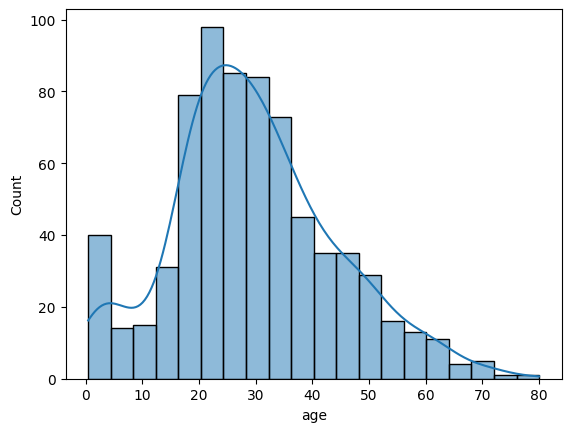

In [10]:
sns.histplot(df, x=df['age'], kde=True)

<Axes: xlabel='fare', ylabel='Count'>

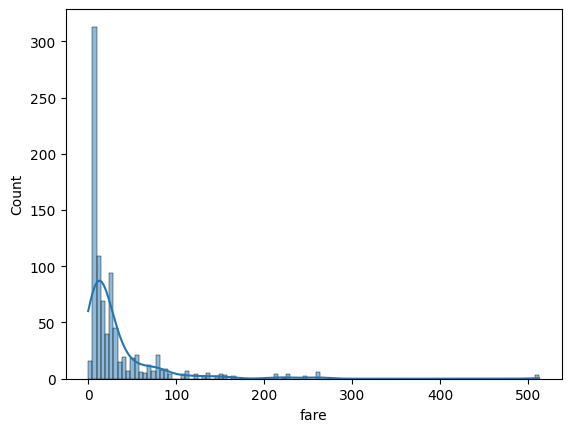

In [11]:
sns.histplot(df, x=df['fare'], kde=1)

<Axes: xlabel='class', ylabel='fare'>

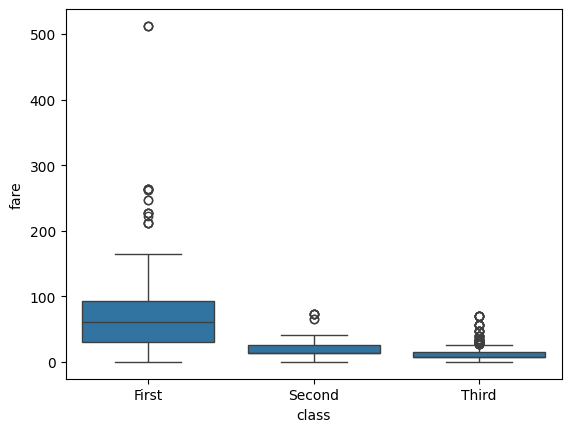

In [12]:
sns.boxplot(df, x='class', y='fare')

In [13]:
# shapiro wilk test to check normality of the data 
stats.shapiro(df['age'])

# We fail to reject null hypothesis because value is not laid in critical region

ShapiroResult(statistic=nan, pvalue=1.0)

In [14]:
# subseting of the data
df_sub_set= df[df['class'] =='Third']

Q1 = df_sub_set['fare'].quantile(0.25)
Q3 = df_sub_set['fare'].quantile(0.75)
# IQR method
IQR = Q3 - Q1
IQR

lower_bond=Q1 - 1.5*IQR
upper_bond=Q3 + 1.5*IQR

df_remved_outlier = df_sub_set[(df['fare'] > lower_bond) & (df['fare'] < upper_bond)]




C:\Users\Salman\AppData\Local\Temp\ipykernel_12040\2309328163.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_remved_outlier = df_sub_set[(df['fare'] > lower_bond) & (df['fare'] < upper_bond)]


<Axes: xlabel='fare', ylabel='Count'>

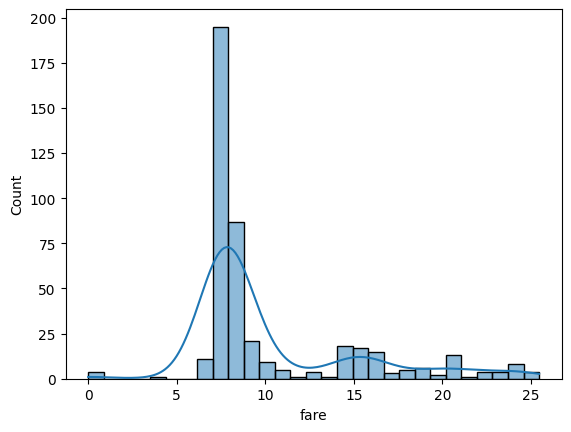

In [15]:
sns.histplot(df_remved_outlier['fare'], kde=1)

In [16]:
stats.shapiro(df_remved_outlier['fare'])

ShapiroResult(statistic=0.7252333164215088, pvalue=2.912313300258229e-26)

In [17]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
# log transformation
df = sns.load_dataset('titanic')
df['fare']=np.log(df['fare'])

c:\Users\Salman\anaconda3\envs\python_ML\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='fare', ylabel='Count'>

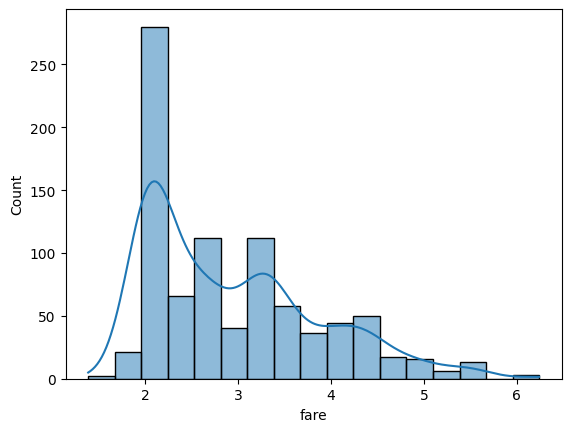

In [20]:

sns.histplot(df['fare'], kde=1)

In [21]:
stats.shapiro(df['fare'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [22]:
df['fare']=np.log(df['fare'])

c:\Users\Salman\anaconda3\envs\python_ML\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,0.683603,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,1.450832,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,0.727559,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,1.379314,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,0.735091,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='fare', ylabel='Count'>

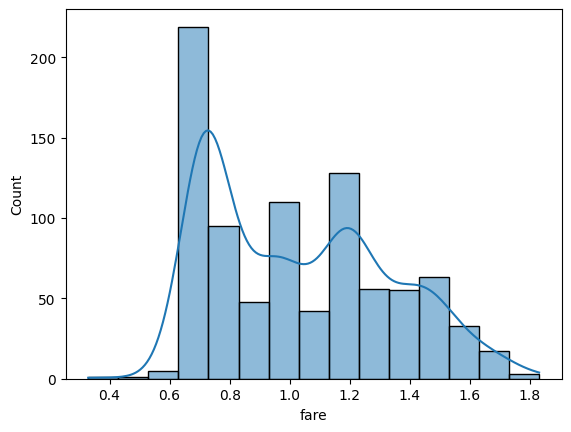

In [23]:

sns.histplot(df['fare'], kde=1)